# Занятие 7

#### Лекторы: Ярослав Петрик, Полина Тихонова

*Составлено с использованием материалов курса лекций «Программирование на языке Python для сбора и анализа данных» Щурова И.В., НИУ ВШЭ*

## Извлечение данных из веб-страниц

### Загрузка веб-страницы: модуль `requests`

Если у вас не сработает строчка ниже, то сделайте `pip install requests` или `conda install requests` в командной строке (например, в *Anaconda Prompt*).

In [147]:
import requests

Модуль `requests` позволяет получать доступ к веб-страницам. Я не буду вдаваться в подробности протокола `http`, но надо понимать, что есть два распространенных способа доступа к веб-страницам: запрос типа *get* и типа *post* (хотя на самом деле видов http-запросов гораздо больше). Запрос типа get - это когда вы передаете серверу какую-то информацию в адресной строке. Например, если вы перейдете по такому адресу: https://www.google.ru/?q=python+анализ+данных, то этим вы просите гугл искать по запросу "python анализ данных вшэ". post-запрос - это когда вам нужно ввести информацию в какую-нибудь форму, например, ввести логин-пароль, который не будет отображать в адресной строке браузера.

Мы пока будем использовать get-запросы.

In [6]:
r = requests.get('http://www.miigaik.ru/')

Чтобы проверить, что страница нормально загрузилась есть команда

In [7]:
r.ok

True

Значение True говорит о том, что все прошло нормально.

In [8]:
q = requests.get('http://www.miigaik.ru/ajlfdjalsdjf')
print(q.ok)

False


Мы попытались перейти по несуществующей странице и она не загрузилась. Вернемся к успешному запросу `r`. Посмотрим на html исходник страницы командой

In [6]:
print(r.text)

    <!DOCTYPE html>
    <html>
    <head>
		<meta name="yandex-tableau-widget" content="logo=http://miigaik.ru/logoyandex.png, color=#ffffff" />
        <meta charset="utf-8">
        <title>Главная страница</title>
        <meta http-equiv="X-UA-Compatible" content="IE=edge">
		<meta name="yandex-verification" content="e1a9b84a8a958a63" />
		<meta name="sputnik-verification" content="6it3YueB5IsSk0Ze" /> 
        <link rel="icon" href="/bitrix/templates/modern_blue_s1/favicon.ico">
        <meta name="viewport" content="width=device-width, initial-scale=1">
        <link href="//fonts.googleapis.com/css?family=PT+Sans:400,700,400italic,700italic|PT+Serif+Caption:400,400italic&amp;subset=latin,cyrillic"
              rel="stylesheet">
        <script src="//ajax.googleapis.com/ajax/libs/jquery/2.1.3/jquery.min.js"></script>
        <link rel="stylesheet" type="text/css" href="//cdn.jsdelivr.net/gh/kenwheeler/slick@1.7.1/slick/slick.css"/>
        <!-- Add the slick-theme.css if you wan

### Немного про HTML

То, что вы видите выше — HTML-страница. HTML (HyperText Markup Language) — это такой язык разметки, являющийся частным случаем стандарта SGML. Другим частным случаем SGML является XML, с которым мы еще встретимся. 

Напишем простенькую HTML-страницу. Удобнее всего это делать в каком-либо редакторе. Но я запишу ее в файл через ноутбук.

In [40]:
my_html = '''
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset = "UTF-8">
    <title>Title</title>
</head>
<body>
<h1>Hello</h1>
<p>I'm a paragraph.</p>
<hr>
<ol>
    <li>One</li>
    <li>Two</li>
</ol>
    
</body>
</html>
'''

In [41]:
with open('my.html', 'w') as f:
    f.write(my_html)

Откройте `my.html` браузером и вы увидите простую веб-страничку. Видно что HTML разбит на специальные фрагменты, которые называются тегами. В тексте выше есть теги: `<html>`, `<head>`, `<title>` и т.д. Каждый тег отмечает какой-то кусочек веб-страницы. Тег `<title>` — это заголовок страницы. Тег `<ol>` отмечает упорядоченный список. Тег `<li>` отвечает элементу списка. Тег `<p>` — абзац (paragraph). Все перечисленные теги являются *парными*: они отмечают какой-то фрагмент текста (возможно, содержащий другие теги), помещая его между соответствующим открывающим и закрывающим тегом (например, `<li>` — открывающий тег, а `</li>` — закрывающий; всё, что между ними — это элемент списка). Исключением здесь является тег `<hr>`, который рисует горизонтальную линию (он работает и без `</hr>`).

Фактически HTML-страница представляет собой набор вложенных тегов. Можно сказать, что это дерево с корнем в теге `<html>`. У каждого тега есть потомки - те теги, которые непосредственно вложены в него. Например, у тега `<body>` потомками будут `<h1>`, `<p>`, `<hr>`, `<ol>`. Получается такое как бы генеалогическое древо.

HTML нас интересует с целью извлечения информации из такого дерева. Одним из наиболее популярных объектов для хранения информации являются таблицы, поэтмоу давайте вставим в наш файл небольшую таблицу: она обозначается тегом `<table>`, каждая строка таблицы выделяется тегом `<tr>` внутри `<table>`, а каждая ячейка — тегом `<td>` внутри `<tr>`.

In [19]:
my_html = '''
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset = "UTF-8">
    <title>Title</title>
    <style type='text/css;'>
        table {
        border-collapse: collapse;
    }

    table, th, td {
        border: 1px solid black;
    }
    </style>
</head>
<body>
<h1>Hello</h1>
<p>I'm a paragraph.</p>
<hr>
<ol>
    <li>One</li>
    <li>Two</li>
</ol>
<table>
    <tr>
        <td>
            Cell 1
        </td>
        <td>
            Cell 2
        </td>
    </tr>
    <tr>
        <td>
            Cell 3
        </td>
        <td>
            Cell 4
        </td>
    </tr>
</table>
</body>
</html>
'''
with open('my.html', 'w') as f:
    f.write(my_html)

Вот так выглядит эта страница:

![Вот такая страничка с табличкой](http://math-info.hse.ru/f/2015-16/all-py/my-html.png)

Допустим, что она лежит где-то на удалённом сайте. Давайте загрузим ее с помощью `requests` и попробуем извлечь какую-то информацию.

In [148]:
r = requests.get('http://math-info.hse.ru/f/2015-16/all-py/my.html')

## BeautifulSoup

Для обработки веб-страниц существует множество пакетов. Проблема с HTML в том, что большинство браузеров ведет себя «прощающе», и поэтому в вебе много плохо-написанных (не по стандарту HTML) HTML-страниц. Впрочем, обработка даже не вполне корректного HTML-кода не так сложна, если под рукой есть подходящие инструменты.

Мы будем пользоваться пакетом *Beautiful Soup 4*. Он входит в стандартную поставку *Anaconda*, но если вы используете другой дистрибутив Python, возможно, вам придётся его установить вручную с помощью `pip install beautifulsoup4`.

> Пакет под названием `BeautifulSoup` — скорее всего, не то, что вам нужно. Это третья версия (*Beautiful Soup 3*), а мы будем использовать четвертую. Так что нам нужен пакет `beautifulsoup4`. Чтобы было совсем весело, при импорте нужно указывать другое название пакета — `bs4`, а импортировать функцию под названием `BeautifulSoup`. В общем, сначала легко запутаться, но эти трудности нужно преодолеть однажды, а потом будет проще.

In [151]:
from bs4 import BeautifulSoup

Чтобы использовать *Beautiful Soup*, нужно передать функции `BeautifulSoup` текст веб-страницы (в виде одной строки). Чтобы он не ругался, я также вручную указываю название парсера (той программы, которая как раз и осуществляет обработку HTML) — с целью совместимости я использую `html.parser` (он входит в поставку Python и не требует установки), но вы можете также попробовать использовать `lxml`, если он у вас установлен.

In [152]:
page = BeautifulSoup(r.text, 'html.parser')

Что теперь лежит в переменной `page`? Давайте посмотрим.

In [153]:
page


<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<title>Title</title>
<style type="text/css;">
        table {
        border-collapse: collapse;
    }

    table, th, td {
        border: 1px solid black;
    }
    </style>
</head>
<body>
<h1>Hello</h1>
<p>I'm a paragraph.</p>
<hr/>
<ol>
<li>One</li>
<li>Two</li>
</ol>
<table>
<tr>
<td>
            Cell 1
        </td>
<td>
            Cell 2
        </td>
</tr>
<tr>
<td>
            Cell 3
        </td>
<td>
            Cell 4
        </td>
</tr>
</table>
</body>
</html>

Мы видим, что объект `page` очень похож на строку, но, на самом деле, это не просто строка. К `page` можно делать запросы. Например:

In [154]:
page.html

<html lang="en">
<head>
<meta charset="utf-8"/>
<title>Title</title>
<style type="text/css;">
        table {
        border-collapse: collapse;
    }

    table, th, td {
        border: 1px solid black;
    }
    </style>
</head>
<body>
<h1>Hello</h1>
<p>I'm a paragraph.</p>
<hr/>
<ol>
<li>One</li>
<li>Two</li>
</ol>
<table>
<tr>
<td>
            Cell 1
        </td>
<td>
            Cell 2
        </td>
</tr>
<tr>
<td>
            Cell 3
        </td>
<td>
            Cell 4
        </td>
</tr>
</table>
</body>
</html>

Мы видим то, что внутри тега `<html>` (это почти вся страница, но самая первая строчка «отрезалась»). Можно пойти вглубь и посмотреть на содержимое `<head>`.

In [155]:
page.html.head

<head>
<meta charset="utf-8"/>
<title>Title</title>
<style type="text/css;">
        table {
        border-collapse: collapse;
    }

    table, th, td {
        border: 1px solid black;
    }
    </style>
</head>

Теперь мы видим только то, что внутри тега `<head>`. Мы можем пойти еще глубже, и получить то, что находится внутри тега `<title>`, который в свою очередь находится внутри тега `<head>` (говорят, что `<title>` является *потомком* `<head>`:

In [156]:
page.html.head.title

<title>Title</title>

Впрочем, можно было бы и не писать так подробно — поскольку в документе есть только один тег `<title>`, мы бы могли не указывать, что он находится внутри `<head>`, который находится внутри `<html>`.

In [157]:
page.head.title

<title>Title</title>

In [158]:
page.title

<title>Title</title>

Одним из потомков `<body>` является `<table>`. Ее можно получить вот так.

In [159]:
page.body.table

<table>
<tr>
<td>
            Cell 1
        </td>
<td>
            Cell 2
        </td>
</tr>
<tr>
<td>
            Cell 3
        </td>
<td>
            Cell 4
        </td>
</tr>
</table>

Допустим, что мне нужно получить несколько элементов с одинаковым тегом, например, все строки `<tr>`. Для этого используется такой синтаксис:

In [160]:
rows = page.body.table.findAll('tr')
rows

[<tr>
 <td>
             Cell 1
         </td>
 <td>
             Cell 2
         </td>
 </tr>, <tr>
 <td>
             Cell 3
         </td>
 <td>
             Cell 4
         </td>
 </tr>]

In [31]:
len(rows)

2

Мы видим, что это список из двух элементов. Так что по нему можно пройти циклом.

In [161]:
for i, row in enumerate(rows):
    print(i)
    print(row)

0
<tr>
<td>
            Cell 1
        </td>
<td>
            Cell 2
        </td>
</tr>
1
<tr>
<td>
            Cell 3
        </td>
<td>
            Cell 4
        </td>
</tr>


У нас есть 2 строчки и каждая из них является таким же объектом BeautifulSoup, как и все предыдущие. Так что к ним можно применить конструкцию row.td

In [162]:
for i, row in enumerate(rows):
    print(i)
    print(row.td)

0
<td>
            Cell 1
        </td>
1
<td>
            Cell 3
        </td>


Мы видим, что если внутри тега `<row>` есть несколько тегов `<td>`, то row.td возьмет первый из них. Поэтому мы получили первый столбец. Но нас интересует не сам тег `<td>`, а строка, которая там лежит. Её можно напечатать вот так.

In [163]:
for i, row in enumerate(rows):
    print(i)
    print(row.td.string)

0

            Cell 1
        
1

            Cell 3
        


Видно, что перед строкой идут ненужные пробелы. Удалим их командой strip

In [164]:
for i, row in enumerate(rows):
    print(i)
    print(row.td.string.strip())

0
Cell 1
1
Cell 3


Давайте загрузим таблицу в виде списка списков

In [165]:
table = []
for i, row in enumerate(rows):
    table.append([])
    for cell in row.findAll('td'):
        table[-1].append(cell.string.strip())
print(table)

[['Cell 1', 'Cell 2'], ['Cell 3', 'Cell 4']]


Вот то же самое, но короче с помощью list comprehensions:

In [166]:
table = []
for row in rows:
    table.append([cell.string.strip() for cell in row.findAll('td')]) 
print(table)

[['Cell 1', 'Cell 2'], ['Cell 3', 'Cell 4']]


Или еще короче (но заковыристее):

In [167]:
table = [[cell.string.strip() for cell in row.findAll('td')] 
         for row in rows]
print(table)

[['Cell 1', 'Cell 2'], ['Cell 3', 'Cell 4']]


Заметим, что вместо `some_beautiful_soup_objec.findAll('sometag')` можно писать короче `some_beautiful_soup_object('sometag')`. Так что можно написать еще короче

In [168]:
table = [[cell.string.strip() for cell in row('td')] 
         for row in rows]
print(table)

[['Cell 1', 'Cell 2'], ['Cell 3', 'Cell 4']]


У тегов, кроме названия, бывают еще свойства — например, в строчке `<html lang="en">` мы видим свойство `lang` у тега `<html>`, имеющее значение `"en"`. Другим важным примером тега со свойствами является тег `<a>`, который создает ссылку. У него есть свойство `href`, которое хранит собственно ссылку.

> Например, строка
> `<a href="https://pythonmiigaik.github.io/">Курс по Python</a>`
> превращается в ссылку
> <a href="https://pythonmiigaik.github.io/">Курс по Python</a>

Теперь представим себе, что мы хотим сделать робота, который будет ходить по веб-страницам, и переходить с одной страницы на другую по ссылкам. Тогда мы сталкиваемся с задачей извлечь из страницы все гиперссылки.
Для этого нужно найти все теги `<a>` на странице, и у всех них взять параметр `<href>`. Для начала покажем как получить свойство объекта, например, `lang` у `html`. Это делается так как будто наш объект словарь, и мы берем его значение по ключу.

In [169]:
page.html['lang']

'en'

Если запросить свойство, которое тег не имеет, то мы получим KeyError, как и со словарем.

In [170]:
page.html['strange']

KeyError: 'strange'

Так же, как у словаря, есть метод `get()`, который ничего не возвращает, если такого свойства нет. Или возвращает значение по умолчанию, определенное нами.

In [105]:
page.html.get('strange')

In [106]:
page.html.get('strange', 'no-such-tag')

'no-such-tag'

Теперь извлечем все ссылки с какого-нибудь сайта

In [25]:
r = requests.get('http://vyshka.math.ru')
page = BeautifulSoup(r.text, 'html.parser')

Вот все ссылки на нашей странице.

In [26]:
page('a')

[<a href="http://top100.rambler.ru/top100/">
 <img alt="" border="0" height="1" src="http://counter.rambler.ru/top100.cnt?188597" width="1"/></a>,
 <a href="http://math.hse.ru/">ÏÆÉÃÉÁÌØÎÏÍÕ ÓÁÊÔÕ 
       ÆÁËÕÌØÔÅÔÁ ÍÁÔÅÍÁÔÉËÉ</a>,
 <a href="http://hse.ru">îéõ ÷ûü</a>,
 <a href="http://math.hse.ru/">ÏÆÉÃÉÁÌØÎÏÇÏ ÓÁÊÔÁ ÆÁËÕÌØÔÅÔÁ</a>,
 <a href="0809/0809.html">2008/09</a>,
 <a href="0910/0910.html">2009/10</a>,
 <a href="1011/1011.html">2010/11</a>,
 <a href="1112/1112.html">2011/12</a>,
 <a href="1213/1213.php">2012/13</a>,
 <a href="1314/1314.php">2013/14</a>,
 <a href="1415/1415.php">2014/15</a>,
 <a href="1516/1516.php">2015/16</a>,
 <a href="1617/1617.php">2016/17</a>]

Как видим, метод `findAll()` (или его сокращённая форма записи в виде просто скобочек) ищет не только по непосредственным «детям» какой-то вершины (в генеалогических терминах), но и по всем потомкам.

Напечатаем сами ссылки

In [27]:
for link in page("a"):
    print(link['href'])

http://top100.rambler.ru/top100/
http://math.hse.ru/
http://hse.ru
http://math.hse.ru/
0809/0809.html
0910/0910.html
1011/1011.html
1112/1112.html
1213/1213.php
1314/1314.php
1415/1415.php
1516/1516.php
1617/1617.php




## P.S. Документация — ваш друг
 Для *Beautiful Soup* документация лежит [здесь](http://www.crummy.com/software/BeautifulSoup/bs4/doc/), а для *requests* [здесь](http://docs.python-requests.org/en/latest/) (начните с Quickstart). 

Другой источник информации о библиотеках — всё тот же веб-поиск, который чаще всего будет выдавать ссылки на сайт с вопросами и ответами http://stackoverflow.com/. Например, набрав [how to parse table with beautifulsoup](https://www.google.ru/search?q=how+to+parse+table+with+beautifulsoup&gws_rd=cr&ei=wXaJVvzQKIfXyQO4v4PYDw) вы получите несколько ссылок на stackoverflow с примерами кода. Кстати, на stackoverflow можно задавать и свои вопросы — но прежде нужно убедиться, что на них не ответили раньше.

## Geopandas

Чтобы установить geopandas, необходимо выполнить в командной строке: *pip install geopandas*, либо в Anaconda Promt: *conda install geopandas*

In [47]:
import geopandas
import pandas as pd
pd.options.display.max_rows = 4

In [48]:
import matplotlib.pyplot as plt

In [132]:
data = geopandas.read_file('data/kobn.shp')

In [133]:
data.drop(0)

CITIES LUZ_OR_CIT   CODE  \
1      Kobenhavn     DK001L  11100   
2      Kobenhavn     DK001L  11100   
3      Kobenhavn     DK001L  11100   
4      Kobenhavn     DK001L  11100   
5      Kobenhavn     DK001L  11100   
6      Kobenhavn     DK001L  11100   
7      Kobenhavn     DK001L  11100   
8      Kobenhavn     DK001L  11100   
9      Kobenhavn     DK001L  11100   
10     Kobenhavn     DK001L  11100   
11     Kobenhavn     DK001L  11100   
12     Kobenhavn     DK001L  11100   
13     Kobenhavn     DK001L  11100   
14     Kobenhavn     DK001L  11100   
15     Kobenhavn     DK001L  11100   
16     Kobenhavn     DK001L  11100   
17     Kobenhavn     DK001L  11100   
18     Kobenhavn     DK001L  11100   
19     Kobenhavn     DK001L  11100   
20     Kobenhavn     DK001L  11100   
21     Kobenhavn     DK001L  11100   
22     Kobenhavn     DK001L  11100   
23     Kobenhavn     DK001L  11100   
24     Kobenhavn     DK001L  11100   
25     Kobenhavn     DK001L  11100   
26     Kobenhavn     DK001L  11100   
27     Kobenhavn     DK001L  11100   
28     Kobenhavn     DK001L  11100   
29     Kobenhavn     DK001L  11100   
30     Kobenhavn     DK001L  11210   
...          ...        ...    ...   
38344  Kobenhavn     DK001L  50000   
38345  Kobenhavn     DK001L  50000   
38346  Kobenhavn     DK001L  50000   
38347  Kobenhavn     DK001L  50000   
38348  Kobenhavn     DK001L  50000   
38349  Kobenhavn     DK001L  50000   
38350  Kobenhavn     DK001L  50000   
38351  Kobenhavn     DK001L  50000   
38352  Kobenhavn     DK001L  50000   
38353  Kobenhavn     DK001L  50000   
38354  Kobenhavn     DK001L  50000   
38355  Kobenhavn     DK001L  50000   
38356  Kobenhavn     DK001L  50000   
38357  Kobenhavn     DK001L  50000   
38358  Kobenhavn     DK001L  50000   
38359  Kobenhavn     DK001L  50000   
38360  Kobenhavn     DK001L  50000   
38361  Kobenhavn     DK001L  50000   
38362  Kobenhavn     DK001L  50000   
38363  Kobenhavn     DK001L  50000   
38364  Kobenhavn     DK001L  50000   
38365  Kobenhavn     DK001L  50000   
38366  Kobenhavn     DK001L  50000   
38367  Kobenhavn     DK001L  50000   
38368  Kobenhavn     DK001L  50000   
38369  Kobenhavn     DK001L  50000   
38370  Kobenhavn     DK001L  50000   
38371  Kobenhavn     DK001L  50000   
38372  Kobenhavn     DK001L  50000   
38373  Kobenhavn     DK001L  50000   

                                                    ITEM PROD_DATE  \
1                   Continuous Urban Fabric (S.L. > 80%)      2009   
2                   Continuous Urban Fabric (S.L. > 80%)      2009   
3                   Continuous Urban Fabric (S.L. > 80%)      2009   
4                   Continuous Urban Fabric (S.L. > 80%)      2009   
5                   Continuous Urban Fabric (S.L. > 80%)      2009   
6                   Continuous Urban Fabric (S.L. > 80%)      2009   
7                   Continuous Urban Fabric (S.L. > 80%)      2009   
8                   Continuous Urban Fabric (S.L. > 80%)      2009   
9                   Continuous Urban Fabric (S.L. > 80%)      2009   
10                  Continuous Urban Fabric (S.L. > 80%)      2009   
11                  Continuous Urban Fabric (S.L. > 80%)      2009   
12                  Continuous Urban Fabric (S.L. > 80%)      2009   
13                  Continuous Urban Fabric (S.L. > 80%)      2009   
14                  Continuous Urban Fabric (S.L. > 80%)      2009   
15                  Continuous Urban Fabric (S.L. > 80%)      2009   
16                  Continuous Urban Fabric (S.L. > 80%)      2009   
17                  Continuous Urban Fabric (S.L. > 80%)      2009   
18                  Continuous Urban Fabric (S.L. > 80%)      2009   
19                  Continuous Urban Fabric (S.L. > 80%)      2009   
20                  Continuous Urban Fabric (S.L. > 80%)      2009   
21                  Continuous Urban Fabric (S.L. > 80%)      2009   
22                  Continuous Urban Fabric (S.L. > 80%)      2009   
23                  Continuous Urban Fabric

In [134]:
data.head(3)

CITIES LUZ_OR_CIT   CODE                                  ITEM  \
0  Kobenhavn     DK001L  11100  Continuous Urban Fabric (S.L. > 80%)   
1  Kobenhavn     DK001L  11100  Continuous Urban Fabric (S.L. > 80%)   
2  Kobenhavn     DK001L  11100  Continuous Urban Fabric (S.L. > 80%)   

  PROD_DATE    SHAPE_LEN    SHAPE_AREA  \
0      2009   267.364043   3886.243449   
1      2009  1314.838061  29226.903814   
2      2009   393.129687   7232.121381   

                                            geometry  
0  POLYGON ((4461387.187374749 3583322.184949964,...  
1  POLYGON ((4461881.406788436 3584545.951881712,...  
2  POLYGON ((4463135.743973736 3584557.919249313,...

In [135]:
data.geometry.area

0        3.886369e+03
1        2.922800e+04
2        7.232469e+03
3        1.539217e+04
4        5.950144e+03
5        9.604369e+03
6        6.648057e+03
7        3.904743e+03
8        2.780388e+03
9        1.547174e+03
10       6.120828e+03
11       7.285498e+03
12       4.347889e+03
13       1.466379e+03
14       3.063949e+04
15       1.502346e+03
16       8.281442e+03
17       7.188866e+03
18       3.779215e+04
19       1.618980e+04
20       4.115435e+04
21       2.728985e+04
22       9.298832e+03
23       3.536054e+03
24       1.655831e+03
25       4.547519e+03
26       1.288389e+04
27       3.596334e+03
28       1.146146e+03
29       1.386101e+04
             ...     
38344    1.455334e+04
38345    3.699168e+04
38346    1.000776e+04
38347    1.441277e+04
38348    1.527196e+04
38349    1.722652e+07
38350    1.774167e+06
38351    1.094537e+04
38352    2.538081e+04
38353    4.604937e+05
38354    2.872553e+04
38355    4.725977e+04
38356    1.183927e+04
38357    1.075963e+05
38358    1

In [136]:
bounds = data.bounds
bounds

minx          miny          maxx          maxy
0      4.461309e+06  3.583254e+06  4.461394e+06  3.583322e+06
1      4.461724e+06  3.584398e+06  4.461974e+06  3.584555e+06
2      4.463032e+06  3.584544e+06  4.463144e+06  3.584692e+06
3      4.462640e+06  3.584678e+06  4.462855e+06  3.584771e+06
4      4.462477e+06  3.584994e+06  4.462563e+06  3.585078e+06
5      4.462346e+06  3.585084e+06  4.462440e+06  3.585217e+06
6      4.458221e+06  3.584827e+06  4.458318e+06  3.584956e+06
7      4.462358e+06  3.585212e+06  4.462446e+06  3.585271e+06
8      4.462602e+06  3.585637e+06  4.462661e+06  3.585711e+06
9      4.461555e+06  3.587598e+06  4.461595e+06  3.587676e+06
10     4.453238e+06  3.589109e+06  4.453327e+06  3.589203e+06
11     4.462752e+06  3.590189e+06  4.462846e+06  3.590297e+06
12     4.462617e+06  3.590694e+06  4.462694e+06  3.590793e+06
13     4.458232e+06  3.590564e+06  4.458258e+06  3.590629e+06
14     4.465834e+06  3.590760e+06  4.466897e+06  3.591366e+06
15     4.463487e+06  3.591471e+06  4.463544e+06  3.591521e+06
16     4.456740e+06  3.590940e+06  4.456827e+06  3.591067e+06
17     4.456374e+06  3.590967e+06  4.456474e+06  3.591271e+06
18     4.463618e+06  3.591486e+06  4.463900e+06  3.591794e+06
19     4.463174e+06  3.591791e+06  4.463412e+06  3.592060e+06
20     4.464126e+06  3.591541e+06  4.465469e+06  3.592189e+06
21     4.463027e+06  3.591821e+06  4.463276e+06  3.592180e+06
22     4.463519e+06  3.592133e+06  4.463656e+06  3.592252e+06
23     4.463858e+06  3.592238e+06  4.463950e+06  3.592327e+06
24     4.463063e+06  3.592369e+06  4.463105e+06  3.592419e+06
25     4.463056e+06  3.592470e+06  4.463170e+06  3.592552e+06
26     4.456435e+06  3.592000e+06  4.456571e+06  3.592165e+06
27     4.462516e+06  3.592591e+06  4.462596e+06  3.592682e+06
28     4.462531e+06  3.592668e+06  4.462586e+06  3.592710e+06
29     4.462502e+06  3.592579e+06  4.462719e+06  3.592762e+06
...             ...           ...           ...           ...
38344  4.465282e+06  3.660507e+06  4.465401e+06  3.660678e+06
38345  4.462271e+06  3.660341e+06  4.462548e+06  3.660624e+06
38346  4.473605e+06  3.661637e+06  4.473721e+06  3.661781e+06
38347  4.473269e+06  3.661554e+06  4.473396e+06  3.661797e+06
38348  4.484139e+06  3.662382e+06  4.484331e+06  3.662605e+06
38349  4.467742e+06  3.653655e+06  4.472033e+06  3.661623e+06
38350  4.474805e+06  3.660440e+06  4.476811e+06  3.662257e+06
38351  4.472692e+06  3.662469e+06  4.472819e+06  3.662644e+06
38352  4.480219e+06  3.663112e+06  4.480529e+06  3.663285e+06
38353  4.452894e+06  3.660947e+06  4.454112e+06  3.661749e+06
38354  4.480035e+06  3.663424e+06  4.480343e+06  3.663655e+06
38355  4.480341e+06  3.664378e+06  4.480591e+06  3.664665e+06
38356  4.454647e+06  3.662983e+06  4.454741e+06  3.663159e+06
38357  4.479590e+06  3.664571e+06  4.480168e+06  3.665025e+06
38358  4.469682e+06  3.664163e+06  4.469792e+06  3.664402e+06
38359  4.471821e+06  3.664434e+06  4.471978e+06  3.664668e+06
38360  4.479258e+06  3.664971e+06  4.479473e+06  3.665214e+06
38361  4.478446e+06  3.664322e+06  4.479232e+06  3.665168e+06
38362  4.453352e+06  3.663270e+06  4.453657e+06  3.663408e+06
38363  4.468973e+06  3.664305e+06  4.469155e+06  3.664533e+06
38364  4.480058e+06  3.665721e+06  4.480207e+06  3.665846e+06
38365  4.473561e+06  3.666790e+06  4.473745e+06  3.667028e+06
38366  4.457628e+06  3.666022e+06  4.457846e+06  3.666132e+06
38367  4.457222e+06  3.666156e+06  4.457362e+06  3.666313e+06
38368  4.473510e+06  3.667108e+06  4.474032e+06  3.667589e+06
38369  4.455992e+06  3.666460e+06  4.456323e+06  3.666729e+06
38370  4.460154e+06  3.666930e+06  4.460260e+06  3.667139e+06
38371  4.469733e+06  3.668519e+06  4.469933e+06  3.668687e+06
38372  4.469498e+06  3.668745e+06  4.470073e+06  3.668858e+06
38373  4.456596e+06  3.667834e+06  4.456705e+06  3.667969e+06

[38374 rows x 4 columns]

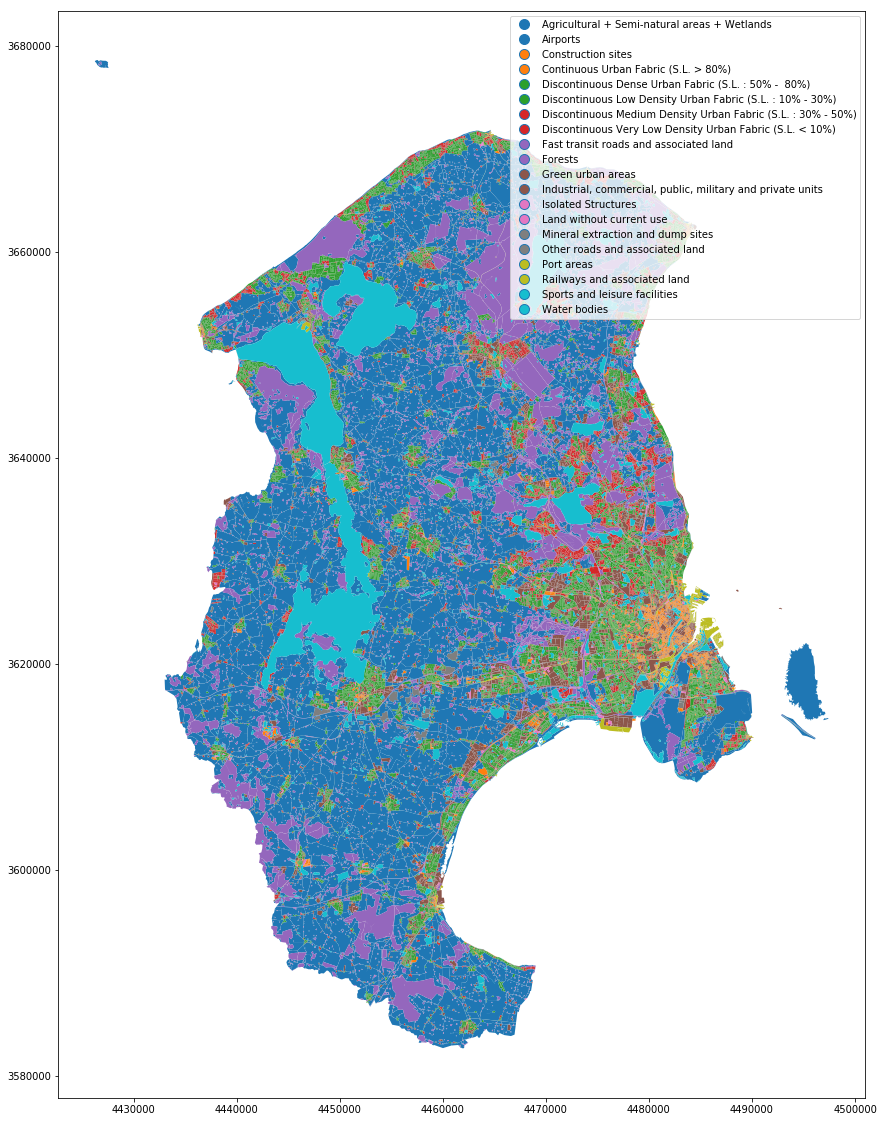

In [137]:
fig, ax = plt.subplots( figsize=(20,20),subplot_kw={'aspect':'equal'})
data.plot(column='ITEM', legend=True, ax=ax)

In [138]:
 data = data[((bounds['minx'] < 4480000) & (bounds['maxx'] > 4440000)
             & (bounds['miny'] < 3660000) & (bounds['maxy'] > 3620000))]

In [139]:
data = data[data['ITEM'] != 'Water bodies']

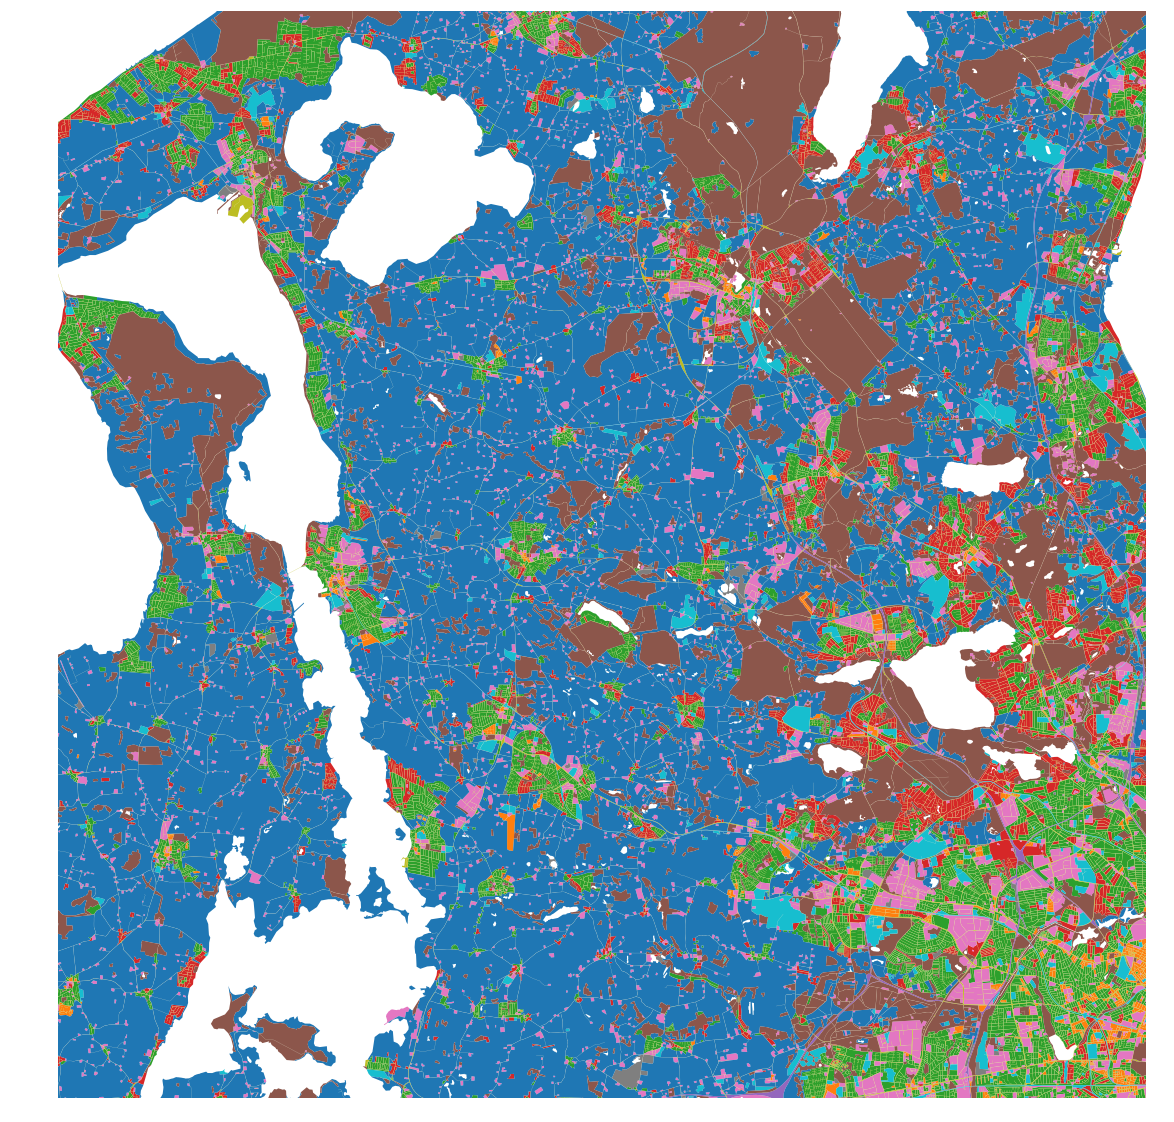

In [143]:
fig, ax = plt.subplots( figsize=(20,20),subplot_kw={'aspect':'equal'})
data.plot(column='ITEM', legend=False, ax=ax)
ax.set_xlim(4440000, 4480000)
ax.set_ylim(3620000, 3660000)
ax.set_axis_off()

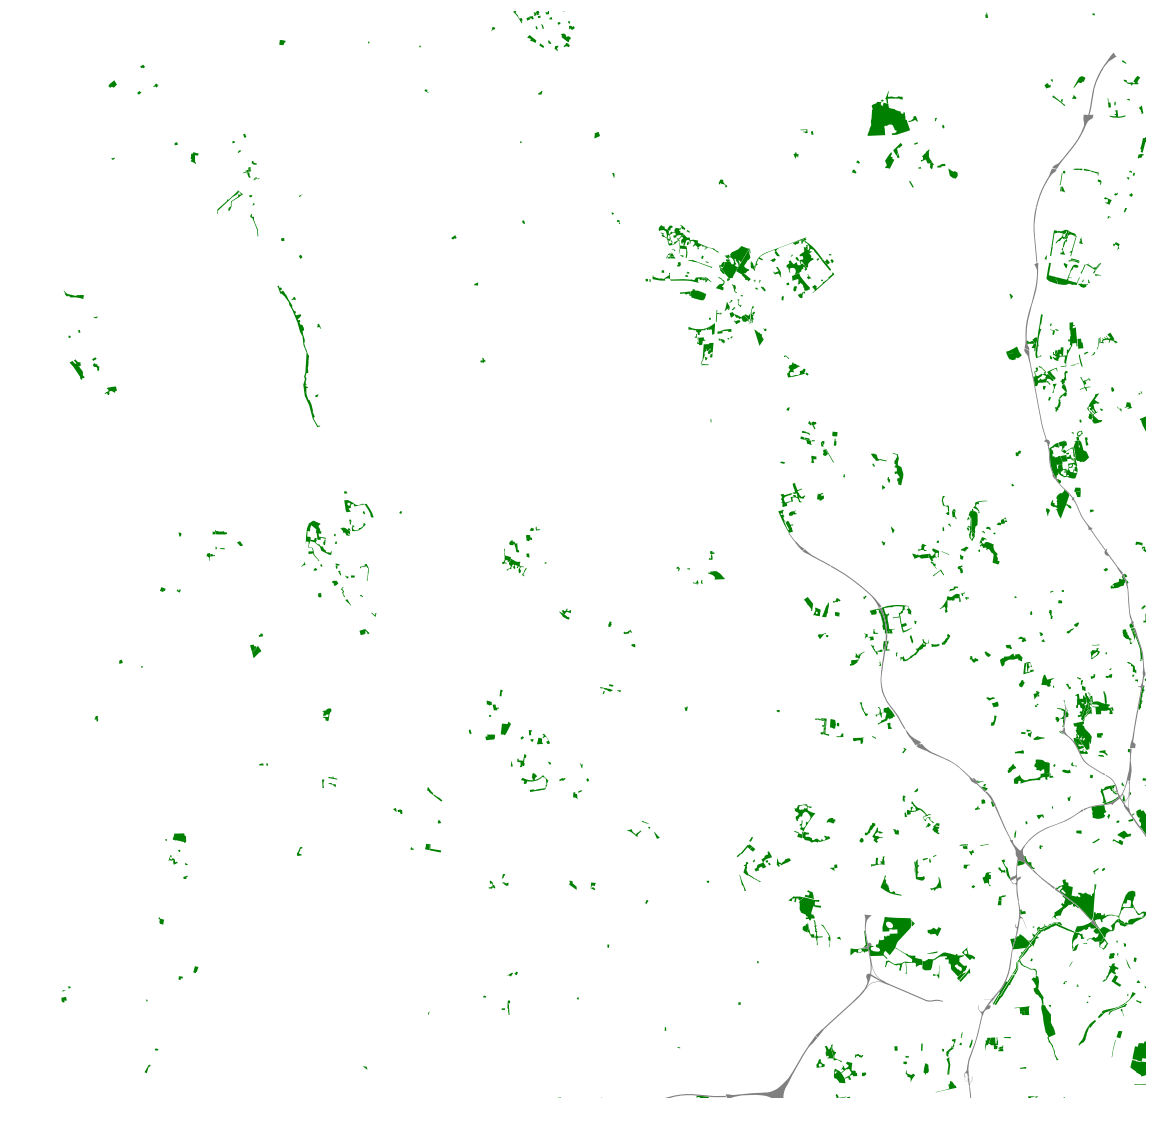

In [144]:
green_areas = data[data['ITEM']=='Green urban areas']
streets=data[data['ITEM']=='Fast transit roads and associated land']
fig, ax = plt.subplots(figsize=(20,20),subplot_kw={'aspect':'equal'})
green_areas.plot(ax=ax, color='green')
streets.plot(ax=ax, color='grey')
ax.set_xlim(4440000, 4480000)
ax.set_ylim(3620000, 3660000)
ax.set_axis_off()

Выглядит не так красиво, но в открытом доступе не оказалось данных о дорогах и улицах. Чтобы это карта стала красивой, необходимо добавить данных об улицах и отобразить.

In [145]:
pd.options.display.max_rows = 60
data.ITEM.value_counts()

Discontinuous Dense Urban Fabric (S.L. : 50% -  80%)            3881
Isolated Structures                                             2689
Industrial, commercial, public, military and private units      2629
Discontinuous Medium Density Urban Fabric (S.L. : 30% - 50%)    2145
Agricultural + Semi-natural areas + Wetlands                    1612
Forests                                                         1427
Discontinuous Low Density Urban Fabric (S.L. : 10% - 30%)       1255
Green urban areas                                                899
Continuous Urban Fabric (S.L. > 80%)                             752
Sports and leisure facilities                                    511
Construction sites                                               141
Railways and associated land                                     128
Discontinuous Very Low Density Urban Fabric (S.L. < 10%)         128
Land without current use                                         125
Mineral extraction and dump sites 